## 数据处理

### 数据的读取及探索

In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [2]:
movies = pd.read_table('movies.dat',sep = '::',header=None)
ratings = pd.read_table('ratings.dat',sep = '::',header=None)
users = pd.read_table('users.dat',sep = '::',header=None)
ratings.columns=['用户ID','电影ID','评分','时间戳']
movies.columns=['电影ID','上市年份','种类']
users.columns=['用户ID','性别','年龄','职业','邮编']

In [3]:
ratings.head()

,用户ID,电影ID,评分,时间戳
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291


In [4]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000209 entries, 0 to 1000208
Data columns (total 4 columns):
用户ID    1000209 non-null int64
电影ID    1000209 non-null int64
评分      1000209 non-null int64
时间戳     1000209 non-null int64
dtypes: int64(4)
memory usage: 30.5 MB


In [5]:
ratings.describe()

,用户ID,电影ID,评分,时间戳
count,1.000209e+06,1.000209e+06,1.000209e+06,1.000209e+06
mean,3.024512e+03,1.865540e+03,3.581564e+00,9.722437e+08
std,1.728413e+03,1.096041e+03,1.117102e+00,1.215256e+07
min,1.000000e+00,1.000000e+00,1.000000e+00,9.567039e+08
25%,1.506000e+03,1.030000e+03,3.000000e+00,9.653026e+08
50%,3.070000e+03,1.835000e+03,4.000000e+00,9.730180e+08
75%,4.476000e+03,2.770000e+03,4.000000e+00,9.752209e+08
max,6.040000e+03,3.952000e+03,5.000000e+00,1.046455e+09


In [6]:
movies.head()

,电影ID,上市年份,种类
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


In [7]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3883 entries, 0 to 3882
Data columns (total 3 columns):
电影ID    3883 non-null int64
上市年份    3883 non-null object
种类      3883 non-null object
dtypes: int64(1), object(2)
memory usage: 91.1+ KB


In [8]:
movies.describe()

,电影ID
count,3883.000000
mean,1986.049446
std,1146.778349
min,1.000000
25%,982.500000
50%,2010.000000
75%,2980.500000
max,3952.000000


In [9]:
users.head()

,用户ID,性别,年龄,职业,邮编
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455


In [10]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6040 entries, 0 to 6039
Data columns (total 5 columns):
用户ID    6040 non-null int64
性别      6040 non-null object
年龄      6040 non-null int64
职业      6040 non-null int64
邮编      6040 non-null object
dtypes: int64(3), object(2)
memory usage: 236.0+ KB


In [11]:
users.describe()

,用户ID,年龄,职业
count,6040.000000,6040.000000,6040.000000
mean,3020.500000,30.639238,8.146854
std,1743.742145,12.895962,6.329511
min,1.000000,1.000000,0.000000
25%,1510.750000,25.000000,3.000000
50%,3020.500000,25.000000,7.000000
75%,4530.250000,35.000000,14.000000
max,6040.000000,56.000000,20.000000


### movies数据处理

In [12]:
movies["a"],movies["b"],movies["c"],movies["d"],movies["e"],movies["f"]=movies["种类"].str.split("|",n=5).str # 按|分割4次

In [13]:
movies.head()

,电影ID,上市年份,种类,a,b,c,d,e,f
0,1,Toy Story (1995),Animation|Children's|Comedy,Animation,Children's,Comedy,NaN,NaN,NaN
1,2,Jumanji (1995),Adventure|Children's|Fantasy,Adventure,Children's,Fantasy,NaN,NaN,NaN
2,3,Grumpier Old Men (1995),Comedy|Romance,Comedy,Romance,NaN,NaN,NaN,NaN
3,4,Waiting to Exhale (1995),Comedy|Drama,Comedy,Drama,NaN,NaN,NaN,NaN
4,5,Father of the Bride Part II (1995),Comedy,Comedy,NaN,NaN,NaN,NaN,NaN


In [14]:
movies1=pd.get_dummies(movies['a'])
movies1.head()

,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0


In [15]:
movies2=pd.get_dummies(movies['b'])
movies2.head()

,Adventure,Animation,Children's,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [16]:
movies3=pd.get_dummies(movies['c'])
movies3.head()

,Animation,Children's,Comedy,Crime,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [17]:
movies4=pd.get_dummies(movies['d'])
movies4.head()

,Children's,Comedy,Crime,Drama,Fantasy,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0


In [18]:
movies5=pd.get_dummies(movies['e'])
movies5.head()

,Fantasy,Musical,Romance,Sci-Fi,Thriller,War
0,0,0,0,0,0,0
1,0,0,0,0,0,0
2,0,0,0,0,0,0
3,0,0,0,0,0,0
4,0,0,0,0,0,0


In [19]:
movies6=pd.get_dummies(movies['f'])
movies6.head()

,War
0,0
1,0
2,0
3,0
4,0


In [20]:
movies1["War"]=movies1["War"]+movies2["War"]+movies3["War"]+movies4["War"]+movies5["War"]+movies6["War"]
movies1.head()

,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0


In [21]:
movies1["Musical"]=movies1["Musical"]+movies2["Musical"]+movies3["Musical"]+movies4["Musical"]+movies5["Musical"]
movies1.head()

,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0


In [22]:
movies1["Fantasy"]=movies1["Fantasy"]+movies2["Fantasy"]+movies3["Fantasy"]+movies4["Fantasy"]+movies5["Fantasy"]
movies1.head()

,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0


In [23]:
movies1["Romance"]=movies1["Romance"]+movies2["Romance"]+movies3["Romance"]+movies4["Romance"]+movies5["Romance"]
movies1.head()

,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0
3,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0


In [24]:
movies1["Sci-Fi"]=movies1["Sci-Fi"]+movies2["Sci-Fi"]+movies3["Sci-Fi"]+movies4["Sci-Fi"]+movies5["Sci-Fi"]
movies1.head()

,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0
3,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0


In [25]:
movies1["Thriller"]=movies1["Thriller"]+movies2["Thriller"]+movies3["Thriller"]+movies4["Thriller"]+movies5["Thriller"]
movies1.head()

,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0
3,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0


In [26]:
movies1["Children's"]=movies1["Children's"]+movies2["Children's"]+movies3["Children's"]+movies4["Children's"]
movies1.head()

,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0
3,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0


In [27]:
movies1["Comedy"]=movies1["Comedy"]+movies2["Comedy"]+movies3["Comedy"]+movies4["Comedy"]
movies1.head()

,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0
3,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0


In [28]:
movies1["Crime"]=movies1["Crime"]+movies2["Crime"]+movies3["Crime"]+movies4["Crime"]
movies1.head()

,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0
3,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0


In [29]:
movies1["Drama"]=movies1["Drama"]+movies2["Drama"]+movies3["Drama"]+movies4["Drama"]
movies1.head()

,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0
3,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0


In [30]:
movies1["Horror"]=movies1["Horror"]+movies2["Horror"]+movies3["Horror"]+movies4["Horror"]
movies1.head()

,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0
3,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0


In [31]:
movies1["Mystery"]=movies1["Mystery"]+movies2["Mystery"]+movies3["Mystery"]+movies4["Mystery"]
movies1.head()

,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0
3,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0


In [32]:
movies1["Western"]=movies1["Western"]+movies2["Western"]+movies3["Western"]+movies4["Western"]
movies1.head()

,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0
3,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0


In [33]:
movies1["Film-Noir"]=movies1["Film-Noir"]+movies2["Film-Noir"]+movies3["Film-Noir"]
movies1.head()

,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0
3,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0


In [34]:
movies1["Animation"]=movies1["Animation"]+movies2["Animation"]+movies3["Animation"]
movies1.head()

,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0
3,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0


In [35]:
movies1["Documentary"]=movies1["Documentary"]+movies2["Documentary"]
movies1.head()

,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0
3,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0


In [36]:
movies1["Adventure"]=movies1["Adventure"]+movies2["Adventure"]
movies1.head()

,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0
3,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0


In [37]:
movies_new=movies.drop(axis=1,columns=['种类','a','b','c','d','e','f'])
movies_new.head()

,电影ID,上市年份
0,1,Toy Story (1995)
1,2,Jumanji (1995)
2,3,Grumpier Old Men (1995)
3,4,Waiting to Exhale (1995)
4,5,Father of the Bride Part II (1995)


In [38]:
movies=pd.concat([movies_new,movies1],axis=1)
movies.head()

,电影ID,上市年份,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2,Jumanji (1995),0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2,3,Grumpier Old Men (1995),0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0
3,4,Waiting to Exhale (1995),0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0
4,5,Father of the Bride Part II (1995),0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0


In [39]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3883 entries, 0 to 3882
Data columns (total 20 columns):
电影ID           3883 non-null int64
上市年份           3883 non-null object
Action         3883 non-null uint8
Adventure      3883 non-null uint8
Animation      3883 non-null uint8
Children's     3883 non-null uint8
Comedy         3883 non-null uint8
Crime          3883 non-null uint8
Documentary    3883 non-null uint8
Drama          3883 non-null uint8
Fantasy        3883 non-null uint8
Film-Noir      3883 non-null uint8
Horror         3883 non-null uint8
Musical        3883 non-null uint8
Mystery        3883 non-null uint8
Romance        3883 non-null uint8
Sci-Fi         3883 non-null uint8
Thriller       3883 non-null uint8
War            3883 non-null uint8
Western        3883 non-null uint8
dtypes: int64(1), object(1), uint8(18)
memory usage: 129.0+ KB


In [40]:
movies['上市年份']=movies.上市年份.str.extract('(\d+)')

In [41]:
movies.head()

,电影ID,上市年份,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,1995,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2,1995,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2,3,1995,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0
3,4,1995,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0
4,5,1995,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0


In [42]:
movies.shape

(3883, 20)

### ratings数据处理

In [43]:
ratings.head()

,用户ID,电影ID,评分,时间戳
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291


In [44]:
ratings.shape

(1000209, 4)

In [45]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000209 entries, 0 to 1000208
Data columns (total 4 columns):
用户ID    1000209 non-null int64
电影ID    1000209 non-null int64
评分      1000209 non-null int64
时间戳     1000209 non-null int64
dtypes: int64(4)
memory usage: 30.5 MB


In [46]:
import time
ratings['时间戳'] = pd.to_datetime(ratings['时间戳'], unit='s') # 将时间戳数据转换为时间格式数据
ratings['时间戳'].head()

0   2000-12-31 22:12:40
1   2000-12-31 22:35:09
2   2000-12-31 22:32:48
3   2000-12-31 22:04:35
4   2001-01-06 23:38:11
Name: 时间戳, dtype: datetime64[ns]

In [47]:
ratings['评论时间']=ratings['时间戳'].dt.year   #提取年份
ratings=ratings.drop(axis=1,columns=['时间戳'])
ratings['评论时间'].unique()

array([2000, 2001, 2002, 2003], dtype=int64)

In [48]:
#每个用户是否只对一个电影进行评分
ratings.groupby(['用户ID','电影ID']).count()

评分  评论时间
用户ID 电影ID          
1    1      1     1
     48     1     1
     150    1     1
     260    1     1
     527    1     1
     531    1     1
     588    1     1
     594    1     1
     595    1     1
     608    1     1
     661    1     1
     720    1     1
     745    1     1
     783    1     1
     914    1     1
     919    1     1
     938    1     1
     1022   1     1
     1028   1     1
     1029   1     1
     1035   1     1
     1097   1     1
     1193   1     1
     1197   1     1
     1207   1     1
     1246   1     1
     1270   1     1
     1287   1     1
     1545   1     1
     1566   1     1
...        ..   ...
6040 3182   1     1
     3201   1     1
     3224   1     1
     3262   1     1
     3289   1     1
     3334   1     1
     3342   1     1
     3359   1     1
     3361   1     1
     3362   1     1
     3388   1     1
     3418   1     1
     3421   1     1
     3422   1     1
     3424   1     1
     3449   1     1
     3471   1     1
     3504   1     1
     3505   1     1
     3521   1     1
     3524   1     1
     3543   1     1
     3547   1     1
     3552   1     1
     3671   1     1
     3683   1     1
     3703   1     1
     3735   1     1
     3751   1     1
     3819   1     1

[1000209 rows x 2 columns]

### users数据处理

In [49]:
users.head()

,用户ID,性别,年龄,职业,邮编
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455


In [50]:
users=users.drop(axis=1,columns='邮编')

In [51]:
users.shape

(6040, 4)

In [52]:
from sklearn import preprocessing
lbl = preprocessing.LabelEncoder()
users['性别']=lbl.fit_transform(users['性别'])

In [53]:
users.head()

,用户ID,性别,年龄,职业
0,1,0,1,10
1,2,1,56,16
2,3,1,25,15
3,4,1,45,7
4,5,1,25,20


### 表连接处理

In [54]:
ratings_movies = pd.merge(ratings,movies,on="电影ID")
ratings_movies.head()

,用户ID,电影ID,评分,评论时间,上市年份,Action,Adventure,Animation,Children's,Comedy,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,1193,5,2000,1975,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,1193,5,2000,1975,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,12,1193,4,2000,1975,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,15,1193,4,2000,1975,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,17,1193,5,2000,1975,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [55]:
ratings_movies_users= pd.merge(ratings_movies,users,on="用户ID")
ratings_movies_users.head()

,用户ID,电影ID,评分,评论时间,上市年份,Action,Adventure,Animation,Children's,Comedy,...,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,性别,年龄,职业
0,1,1193,5,2000,1975,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,10
1,1,661,3,2000,1996,0,0,1,1,0,...,1,0,0,0,0,0,0,0,1,10
2,1,914,3,2000,1964,0,0,0,0,0,...,1,0,1,0,0,0,0,0,1,10
3,1,3408,4,2000,2000,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,10
4,1,2355,5,2001,1998,0,0,1,1,1,...,0,0,0,0,0,0,0,0,1,10


### 划分部分数据集 归一化处理 用来确定最优K值

In [56]:
ratings_movies_users = ratings_movies_users.sample(10000)

### 数据归一化处理

In [57]:
from sklearn.preprocessing import MinMaxScaler

data_pre = ratings_movies_users.iloc[:,3:].values
mms = MinMaxScaler()
data_norm = mms.fit_transform(data_pre)
data_norm

array([[0.        , 0.66055352, 0.        , ..., 0.        , 0.43636364,
        0.05      ],
       [0.        , 0.66588863, 0.        , ..., 1.        , 0.43636364,
        0.7       ],
       [0.        , 0.65755252, 0.        , ..., 1.        , 0.43636364,
        0.6       ],
       ...,
       [0.        , 0.66555519, 1.        , ..., 0.        , 0.43636364,
        0.2       ],
       [0.        , 0.66555519, 1.        , ..., 1.        , 0.30909091,
        0.95      ],
       [0.        , 0.66155385, 0.        , ..., 1.        , 0.8       ,
        0.3       ]])

## 最优K值的确定

In [58]:
from sklearn.cluster import KMeans

In [59]:
#sse
import datetime
start = datetime.datetime.now()

sse=[]
for k in range(1,20):
    km=KMeans(n_clusters=k)
    km.fit(data_norm)
    sse.append(km.inertia_)

end = datetime.datetime.now()
print (end-start)

0:00:10.032174


In [60]:
sse

[20273.126731381828,
 17457.706905761406,
 15343.596894000639,
 14131.759454331908,
 13433.498857637149,
 12858.715895064104,
 12293.94843318285,
 11908.728366258561,
 11347.997796107933,
 11051.189242540358,
 10445.220839927011,
 10180.964725707629,
 10048.895872505123,
 9693.472968406188,
 9502.019761360005,
 9290.154333288367,
 9167.955705384931,
 8902.042172545747,
 8677.354909062693]

In [61]:
import matplotlib.pyplot  as  plt

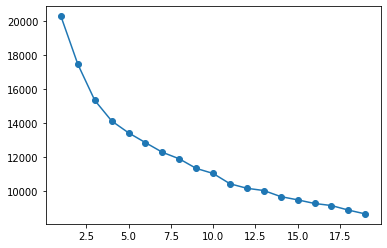

In [62]:
plt.plot(range(1,20),sse,marker='o');

### 轮廓系数

In [63]:
from  sklearn.metrics import  silhouette_score

In [64]:
#轮廓系数
import datetime
start = datetime.datetime.now()

score=[]
for k in range(2,20):
    km=KMeans(n_clusters=k)
    res_km=km.fit(data_norm)
    score.append(silhouette_score(data_norm,res_km.labels_))

end = datetime.datetime.now()
print (end-start)

0:01:02.010190


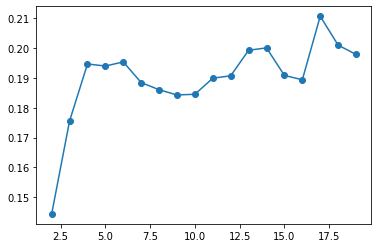

In [65]:
plt.plot(range(2,20),score,marker='o')

## 聚类

In [66]:
km=KMeans(n_clusters=17)
km.fit(data_norm)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=17, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [67]:
km.n_clusters

17

In [68]:
km.labels_

array([16,  1,  0, ..., 10,  3,  0])

In [69]:
ratings_movies_users['类别']=km.labels_

In [70]:
ratings_movies_users.head()

,用户ID,电影ID,评分,评论时间,上市年份,Action,Adventure,Animation,Children's,Comedy,...,Mystery,Romance,Sci-Fi,Thriller,War,Western,性别,年龄,职业,类别
672443,3829,3543,4,2000,1982,0,0,0,0,1,...,0,0,0,0,0,0,0,25,1,16
414680,5522,2336,5,2000,1998,0,0,0,0,0,...,0,0,0,0,0,0,1,25,14,1
717636,1503,1997,4,2000,1973,0,0,0,0,0,...,0,0,0,0,0,0,1,25,12,0
644424,2618,266,5,2000,1994,0,0,0,0,0,...,0,1,0,0,1,1,0,18,4,13
877976,5912,953,3,2000,1946,0,0,0,0,0,...,0,0,0,0,0,0,1,25,1,1


In [71]:
cluster=ratings_movies_users.loc[:,['用户ID','类别']]

In [72]:
cluster.head()

,用户ID,类别
672443,3829,16
414680,5522,1
717636,1503,0
644424,2618,13
877976,5912,1


In [73]:
cluster.to_csv('cluster.csv',encoding='utf-8',index=False)

## 基于用户聚类的结果进行个性化推荐

将你没有看过的电影，你同一类群中大家又都喜欢的，推荐给你

- 1、用户没看过的电影ID列表【用户-电影（not）】
- 2、【用户-电影（not）】匹配用户类群【用户-电影（not）-类别】
- 3、用户对电影的喜好度【用户-电影-评分】
- 4、【用户-电影-评分】匹配用户类别【用户-电影-评分-类别】
- 5、同一类别中的用户对同一种电影的喜好度进行聚合，得到，用户类别对每一个电影的喜好度【类别-电影-平均评分】
- 6、将2与5进行合并（电影-类别），得到【用户-电影（not）-类别-类别平均评分】
- 7、对用户进行分组排序，个性化推荐

In [74]:
#1、用户没看过的电影信息列表【用户-电影（not）】
ratings_movies_users['是否看过']='suibianxie'
user_movies_freq=ratings_movies_users.groupby(['用户ID','电影ID']).count().reset_index()
user_movies_all=user_movies_freq.pivot_table(index='用户ID',columns='电影ID',values='是否看过').fillna(0)
user_movies_all=user_movies_all.stack().reset_index()
user_movies_all.rename(columns={0:'是否看过'},inplace=True)
user_movies_not=user_movies_all[user_movies_all.是否看过==0].drop('是否看过',axis=1)
user_movies_not.head()

,用户ID,电影ID
0,2,1
1,2,2
2,2,3
3,2,4
4,2,5


In [75]:
#2、【用户-电影（not）】匹配用户类别电影（not）【用户-电影（not）-类别】
user_not_cluster=pd.merge(user_movies_not,cluster,on='用户ID',how='left')
user_not_cluster.head()

,用户ID,电影ID,类别
0,2,1,2
1,2,2,2
2,2,3,2
3,2,4,2
4,2,5,2


In [76]:
#3、定义喜欢（用户对电影的评分表示喜好度），构建用户对电影的喜好度【用户-电影-评分】
pingfen = ratings_movies_users[['用户ID','电影ID','评分']]

In [77]:
#4、【用户-电影-评分】匹配用户类别【用户-电影-评分-类别】
user_movies_freq_cluster=pd.merge(pingfen,cluster,on='用户ID',how='left')

In [78]:
user_movies_freq_cluster=user_movies_freq_cluster.drop('用户ID',axis=1)
user_movies_freq_cluster.head()

,电影ID,评分,类别
0,3543,4,16
1,3543,4,13
2,3543,4,3
3,3543,4,15
4,3543,4,15


In [79]:
#5、同一类别中的用户对同一电影的评分进行聚合，得到，用户类别对每一个电影的评分【类别-电影-平均评分】
cluster_movies_freq=user_movies_freq_cluster.groupby(['类别','电影ID']).mean()
cluster_movies_freq.reset_index(inplace=True)
cluster_movies_freq.head()

,类别,电影ID,评分
0,0,1,3.5
1,0,2,2.0
2,0,5,2.0
3,0,6,4.0
4,0,9,2.0


In [80]:
#6、将2与5进行合并（电影-类别），得到【用户-电影（not）-类别-类别平均评分】
res=pd.merge(user_not_cluster,cluster_movies_freq,on=['电影ID','类别'],how='left').fillna(0)
res.head()

,用户ID,电影ID,类别,评分
0,2,1,2,3.0
1,2,2,2,3.2
2,2,3,2,2.5
3,2,4,2,0.0
4,2,5,2,3.0


In [81]:
#7、对用户进行分组排序，推荐
group=res.groupby('用户ID')  #按用户ID聚合
def get_topk(group,k):      #按评分排序
    rec=group.sort_values('评分',ascending=False)[:k]
    return rec
topk=group.apply(get_topk,k=20)  #得到前k个推荐
topk.head()

用户ID  电影ID  类别   评分
用户ID                          
2    730      2  1269   2  5.0
     1508     2  2580   2  5.0
     1804     2  3072   2  5.0
     1785     2  3039   2  5.0
     1783     2  3036   2  5.0

In [82]:
del topk['用户ID']
topk.index=topk.index.droplevel(1)
topk.reset_index(inplace=True)
topk.head()

,用户ID,电影ID,类别,评分
0,2,1269,2,5.0
1,2,2580,2,5.0
2,2,3072,2,5.0
3,2,3039,2,5.0
4,2,3036,2,5.0


In [83]:
topk.to_csv('topk.csv',encoding='utf-8',index=False)